In [64]:
%pylab inline
import pandas as pd
from pykalman import KalmanFilter

Populating the interactive namespace from numpy and matplotlib


In [65]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

In [66]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

2015-04-11


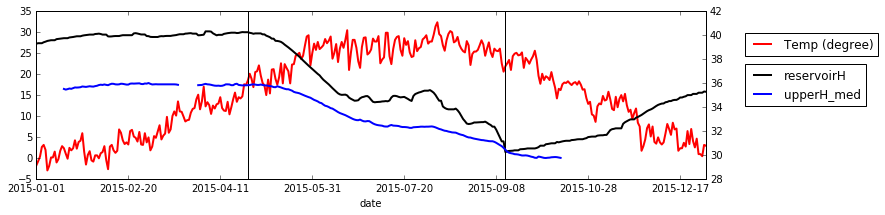

In [67]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 255
itime_ref1 = 115
ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
print df['date'].values[itime_ref]

In [68]:
print itime
print df.values[itime]

100
[100L '2015-04-11' 40.04 35.77 20.56 nan 14.5 61.5]


In [72]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 100
itime_ref = 100
print df['date'].values[itime]
elecind = () #[15, 150,200]
 

# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=294)\
         ,itime=IntSlider(min=0, max=360, step=1, value=200)\
         ,flag=ToggleButtons(options=["std", "rho"]))

NameError: global name 'vizDCtimeSeries' is not defined

<function __main__.<lambda>>

C:\Users\sungkeun\Anaconda2\lib\site-packages\pandas\tools\plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


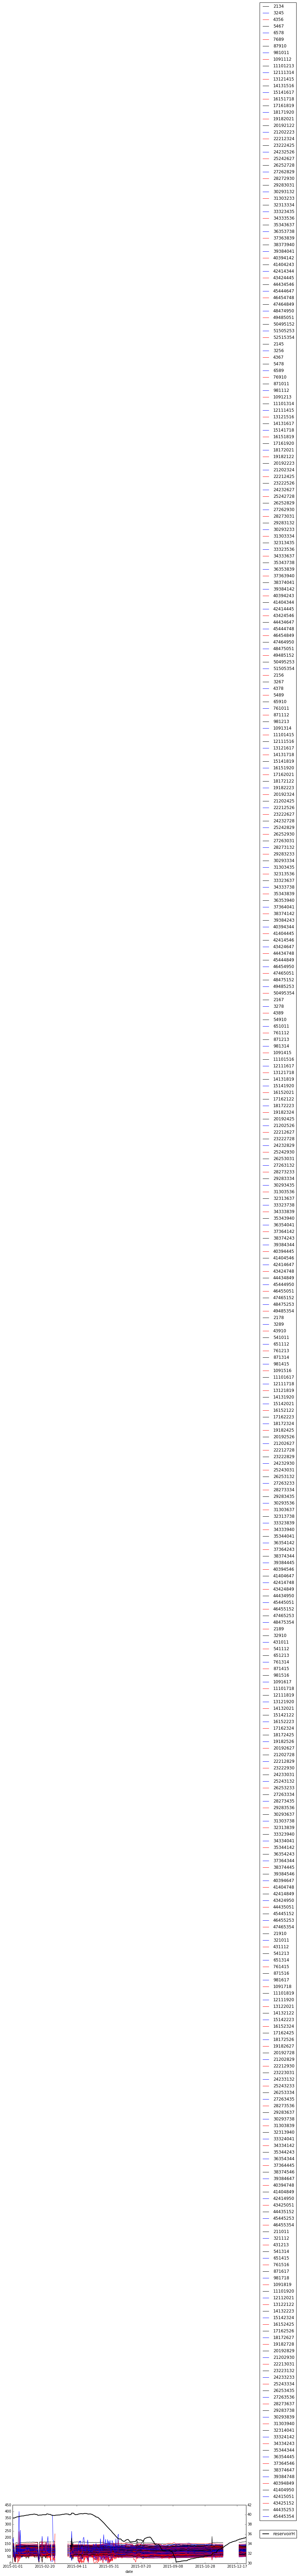

In [8]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'])
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')

In [15]:
print elecind

()


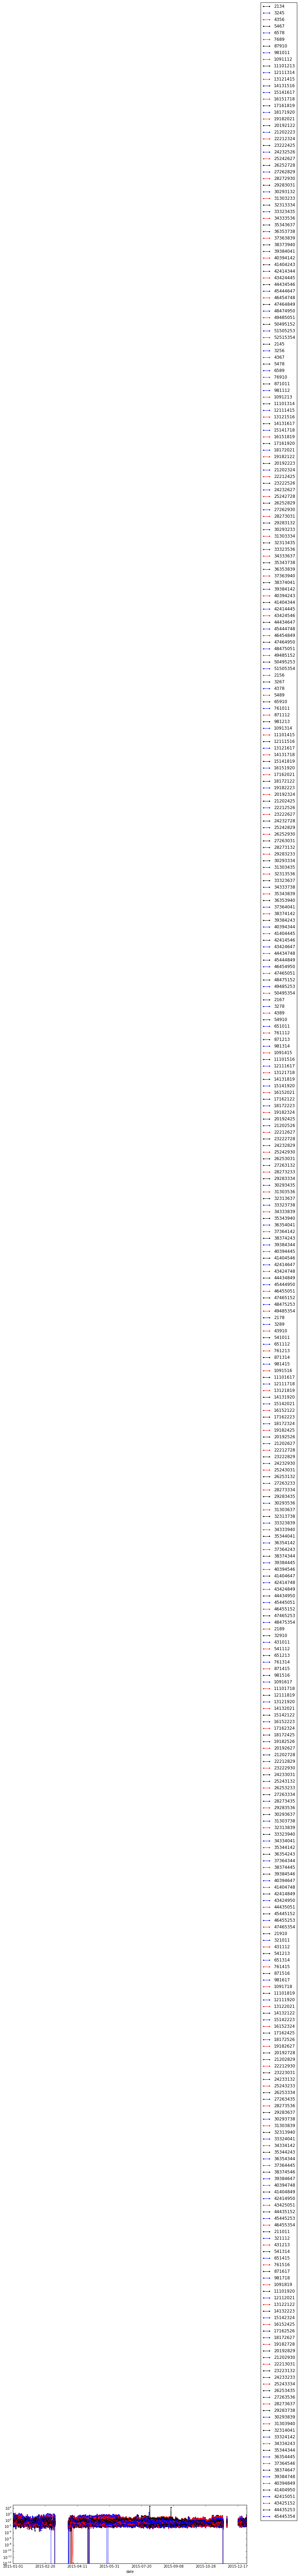

In [9]:
ax1 = plt.subplot(111)
df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", marker='.', lw=1)
ax1.set_yscale('log')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

In [10]:
txrxID =  df_DC.keys()[1:-1]
xmasking = lambda x: np.ma.masked_where(np.isnan(x.values), x.values) 

In [11]:
#x= electrodeID[elecind] 
x= df_DC[txrxID[elecind]]
max3 = pd.rolling_max(x, 3)

In [79]:
pd.rolling_max??

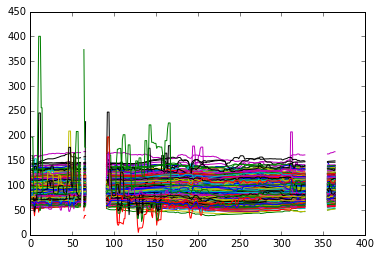

In [80]:
#plt.plot(x)
plt.plot(max3)

In [86]:
from ipywidgets import interact

In [93]:
# making matrix like max3 (but with zeros)
newdata = np.zeros_like(max3)

In [97]:
newdata.shape

(365L, 380L)

In [99]:
ndata = newdata.shape[1]
for i in range(ndata):
    x= df_DC[txrxID[i]]
    #median10 = pd.rolling_median(x, 6)
    mean10 = pd.rolling_max(x, 3)
    # Masking array having NaN
    xm = xmasking(mean10)
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = x[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=1)
    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(xm)    
    newdata[:,i] = state_means.flatten()

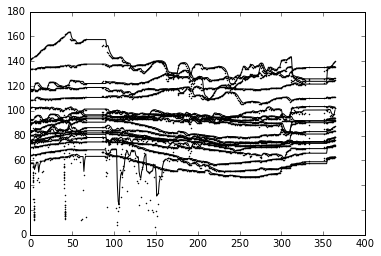

In [109]:
for i in range(0,379,20):
    x= df_DC[txrxID[i]]
    plt.plot(newdata[:,i], 'k')
    plt.plot(x, 'k.', ms=2)    

In [110]:
df_DC_new = df_DC.copy()

In [131]:
# electrode_index = df_DC_new.keys()[1:381]
# for index in electrode_index:
#     df_DC_new.set_value(newdata[:,i].flatten())

In [129]:
df_DC_new[electrode_index[0]].values.

array([ 63.84345,  64.12665,  64.3166 ,  38.68695,  12.92015,  64.7369 ,
        64.6879 ,  64.75435,  64.8425 ,  65.00315,  65.12855,  65.1978 ,
        65.5597 ,  66.0347 ,  66.04225,  66.09785,  66.1789 ,  66.2807 ,
        66.4084 ,  66.4362 ,  66.57285,  66.6586 ,  66.8745 ,  67.0606 ,
        67.0912 ,  67.0714 ,  67.0271 ,  66.9051 ,  67.0931 ,  67.2265 ,
        67.3768 ,  67.5879 ,  67.66945,  67.72365,  67.7887 ,  67.90175,
        67.99695,  68.1176 ,  68.15855,  68.2674 ,  41.07315,  13.7136 ,
        68.5841 ,  68.7476 ,  68.8235 ,  68.8923 ,  68.8084 ,  69.0525 ,
        69.0205 ,  69.02705,  68.9583 ,  68.7698 ,  68.82865,  68.71845,
        68.5521 ,  68.45265,  68.36215,  68.2137 ,  68.2514 ,  68.29665,
        68.4498 ,       nan,  68.5153 ,  68.49645,  68.5483 ,  68.50635,
        68.4229 ,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 

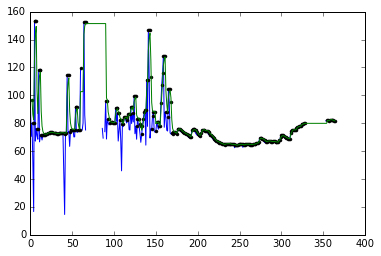

In [89]:
i = 112
def viz(i):
    x= df_DC[txrxID[i]]
    #median10 = pd.rolling_median(x, 6)
    mean10 = pd.rolling_max(x, 3)
    #x1 = median10
    #x2 = mean10
    # Masking array having NaN
    xm = xmasking(mean10)
    # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = x[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=1)
    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(xm)

    plt.plot(x)
    plt.plot(mean10, 'k.')
    #plt.plot(x1)
    #plt.plot(x2)
    plt.plot(state_means)
    # plt.legend([ i, 'Kalman Estimate'])
    # print df_DC[txrxID[i]]
interact(viz, i=(0,389,10))

In [33]:
print df_DC[txrxID[i]]

0      57.89075
1      57.89450
2      57.89450
3      28.98345
4      11.76285
5      49.44240
6      56.66555
7      58.80875
8      44.39820
9      45.58765
10     42.97135
11     59.19140
12     59.25550
13     59.60980
14     50.63365
15     51.34245
16     59.46660
17     60.19040
18     60.74835
19     60.81620
20     60.98585
21     61.16870
22     61.55130
23     61.83595
24     60.13200
25     61.36280
26     61.20450
27     61.95285
28     61.89820
29     62.01880
         ...   
335         NaN
336         NaN
337         NaN
338         NaN
339         NaN
340         NaN
341         NaN
342         NaN
343         NaN
344         NaN
345         NaN
346         NaN
347         NaN
348         NaN
349         NaN
350         NaN
351    61.55510
352         NaN
353    61.79450
354    62.06025
355    61.95850
356    61.93395
357    62.37320
358    62.78220
359    62.41465
360    62.64650
361    62.19220
362    62.11495
363    62.32985
364    62.61260
Name: 51505354, dtype: f

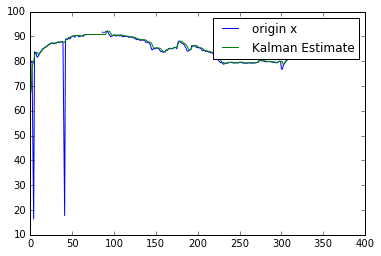

In [45]:
i = 105


x= df_DC[txrxID[i]]
#median10 = pd.rolling_median(x, 6)
mean10 = pd.rolling_max(x, 3)
#x1 = median10
#x2 = mean10
# Masking array having NaN
xm = xmasking(mean10)
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 67.6,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=1)
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(xm)

#plt.plot(x1)
plt.plot(x)
#plt.plot(x1)
#plt.plot(x2)
plt.plot(state_means)
plt.legend([  'origin x','Kalman Estimate'])

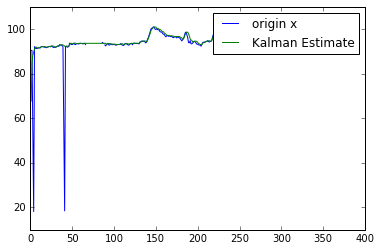

In [22]:
i = 300


x= df_DC[txrxID[i]]
#median10 = pd.rolling_median(x, 6)
mean10 = pd.rolling_max(x, 3)
#x1 = median10
#x2 = mean10
# Masking array having NaN
xm = xmasking(mean10)
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 67.6,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=1)
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(xm)

#plt.plot(x1)
plt.plot(x)
#plt.plot(x1)
#plt.plot(x2)
plt.plot(state_means)
plt.legend([  'origin x','Kalman Estimate'])